In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff, writeTiff
from utils.lay_stack import lay_stack
from utils.imgShow import imgShow
from utils.get_dem import get_dem
from glob import glob
from utils.imgs_in_extent import imgs_in_extent


### 1. Check the dem generated by one aster stereo image.

In [4]:
path_dem_aster_1 = 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.10452579/run-DEM.tif'
path_dem_aster_2 = 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.20040811/run-DEM.tif'


In [5]:
dem_aster_1, dem_aster_1_info = readTiff(path_dem_aster_1)
dem_aster_2, dem_aster_2_info = readTiff(path_dem_aster_2)


Text(0.5, 1.0, 'Generated aster DEM 2')

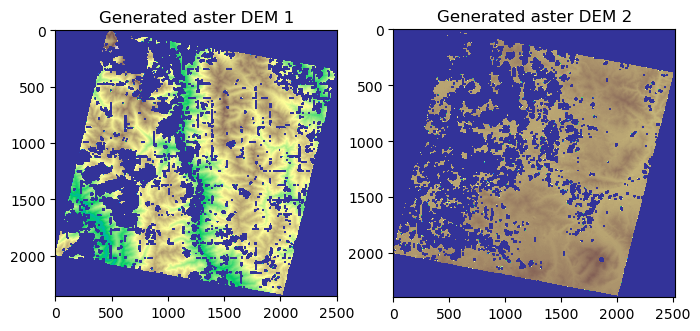

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(dem_aster_1, vmin=0, vmax=7000, cmap='terrain')
plt.title('Generated aster DEM 1')
plt.subplot(1,2,2)
plt.imshow(dem_aster_2, vmin=0, vmax=7000, cmap='terrain')
plt.title('Generated aster DEM 2')


### 2. Check the dem tile generated by aster stereo image.

In [7]:
# bottoms=(31 31 31 31 31 30 30 30 30 30 30 30 29 29 29 29 29 29 29 29 28 28 28 28 28 27 27 27)
# lefts=  (91 92 93 94 95 91 92 93 94 95 96 97 91 92 93 94 95 96 97 98 94 95 96 97 98 96 97 98)
tile_b, tile_l = 30, 94
path_tile_2007 = 'data/aster-stereo/SETP-2007/tiles-dem/tile-'+str(tile_b)+'-'+str(tile_l)+'/dems_mosaic_wgs84_subs.tif'
path_tile_2020 = 'data/aster-stereo/SETP-2020/tiles-dem/tile-'+str(tile_b)+'-'+str(tile_l)+'/dems_mosaic_wgs84_subs.tif'


In [8]:
dem_tile_2007, dem_tile_2007_info = readTiff(path_tile_2007)
dem_tile_2020, dem_tile_2020_info = readTiff(path_tile_2020)


Text(0.5, 1.0, 'tiled DEM 2020')

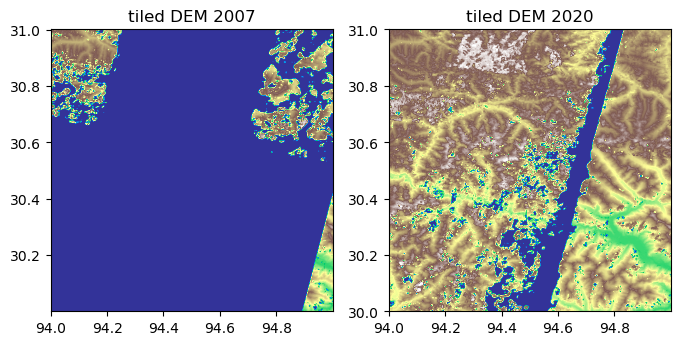

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(dem_tile_2007, vmin=0, vmax=7000, extent=dem_tile_2007_info['geoextent'], cmap='terrain')
plt.title('tiled DEM 2007')
plt.subplot(1,2,2)
plt.imshow(dem_tile_2020, vmin=0, vmax=7000, extent=dem_tile_2020_info['geoextent'], cmap='terrain')
plt.title('tiled DEM 2020')
